<a href="https://colab.research.google.com/github/deepu718/sentimental_analysis_project/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!kaggle datasets download abhi8923shriv/sentiment-analysis-dataset

 90% 49.0M/54.4M [00:00<00:00, 94.7MB/s]
100% 54.4M/54.4M [00:00<00:00, 86.7MB/s]


In [7]:
! unzip sentiment-analysis-dataset

Archive:  sentiment-analysis-dataset.zip
  inflating: test.csv                
  inflating: testdata.manual.2009.06.14.csv  
  inflating: train.csv               
  inflating: training.1600000.processed.noemoticon.csv  


In [8]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",delimiter=',', encoding='ISO-8859-1')
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [17]:
df.columns = ['Sentiment', 'Id', 'Date', 'Query', 'User', "Text"]
df.head()

,Sentiment,Id,Date,Query,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [20]:
# we require only Sentiment and text column
df = df[["Sentiment", "Text"]]
df.columns

Index(['Sentiment', 'Text'], dtype='object')

In [29]:
# Just in case remove the NUll, mising values and reset the index
df.dropna()
df.reset_index(drop=True)
df.head()

,Sentiment,Text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [30]:
df["Sentiment"].value_counts()

0    799996
4    248576
Name: Sentiment, dtype: int64

In [48]:
df["Sentiment"] = df["Sentiment"].replace({4,1})
df["Sentiment"].value_counts()

0    799996
1    248576
Name: Sentiment, dtype: int64


*   0 represents negative statement
*   1 represents positive statement



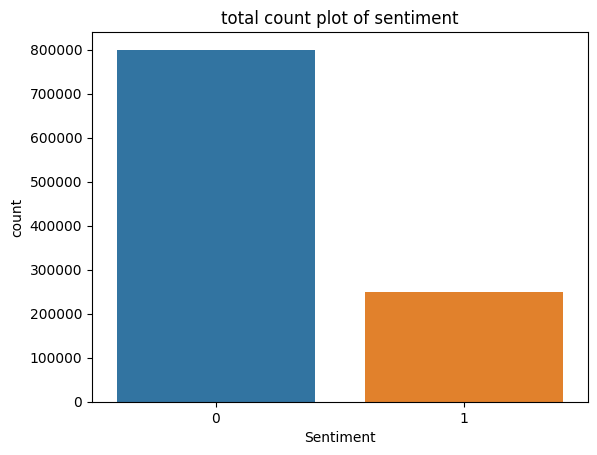

In [58]:
# Visualize the count
sns.countplot(data=df, x="Sentiment")
plt.title("total count plot of sentiment")
plt.show()

since the number of negative reviews are more than positive reviews we will downsample the data to have same count of sentiment.

## Downsampling the data

In [53]:
df_neg = df[df["Sentiment"]==0]
df_pos = df[df["Sentiment"]==1]

In [54]:
df_pos.shape

(248576, 2)

In [55]:
from sklearn.utils import resample
df_neg_downsampled = resample(df_neg,
                              replace=False,
                              n_samples=len(df_pos),
                              random_state=42)

In [59]:
df = df_neg_downsampled.append(df_pos)
df.head()

<ipython-input-59-4bfa19943482>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_neg_downsampled.append(df_pos)


,Sentiment,Text
212188,0,@amruth92 early bird! and you didnt reply to m...
674330,0,It is sooo hot tonight. I wish I had my pool u...
752234,0,@darkandrez No washing clothes
415739,0,@asexiness That sucks!
138859,0,"until now, i haven't watch yet the finale of A..."


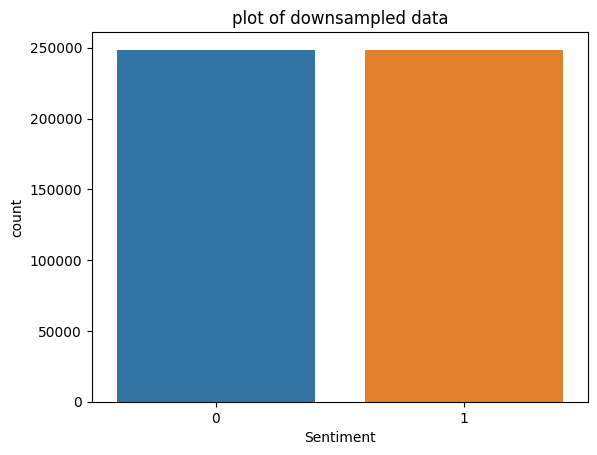

In [62]:
# visualizing the downsample
sns.countplot(x=df["Sentiment"], data=df)
plt.title("plot of downsampled data")
plt.show()

## Pre-Processing

In [76]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [71]:
# remove stopwords and puntuation marks
stop_words_punc = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['Text'].tolist()
print(corpus[0])

@amruth92 early bird! and you didnt reply to my facebook wall post  xo


In [77]:
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text
            if not word in stop_words_punc]
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [78]:
data_processed = pd.DataFrame()
data_processed["Text"] = final_corpus_joined
data_processed["Sentiment"] = df["Sentiment"].values

In [81]:
data_processed.head()

,Text,Sentiment
0,amruth early bird didnt reply facebook wall po...,0
1,sooo hot tonight wish pool outside skinny dipp...,0
2,darkandrez washing clothes,0
3,asexiness suck,0
4,watch yet finale ai waiting replay always miss...,0


## Exploratory data analysis

In [92]:
data_eda = pd.DataFrame()
data_eda["Text"] = final_corpus
data_eda["Sentiment"] = df["Sentiment"].values

In [111]:
positive = data_eda[data_eda["Sentiment"] == 1]
positive_list = positive["Text"].tolist()

negative = data_eda[data_eda["Sentiment"] == 0]
negative_list = negative["Text"].tolist()

In [112]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

Text(0.5, 1.0, 'Positive')

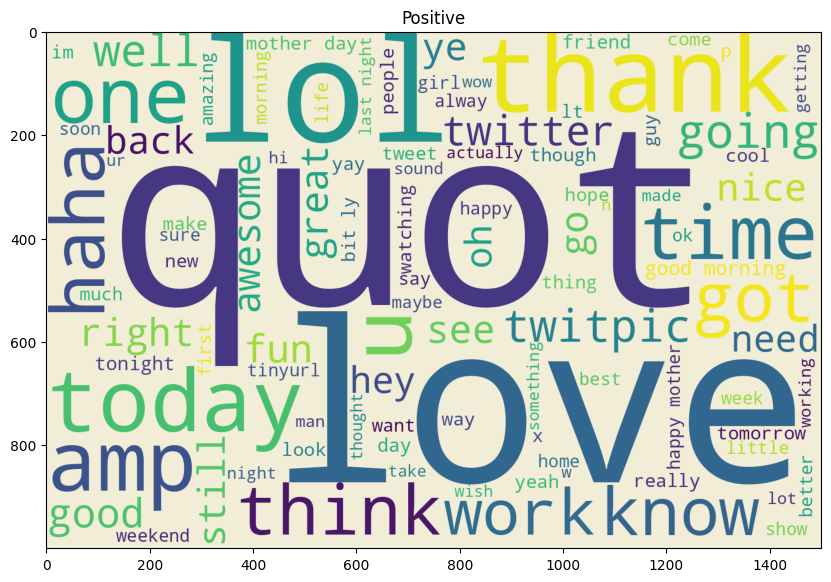

In [113]:
# positive data
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1500,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Positive")

Text(0.5, 1.0, 'Negative')

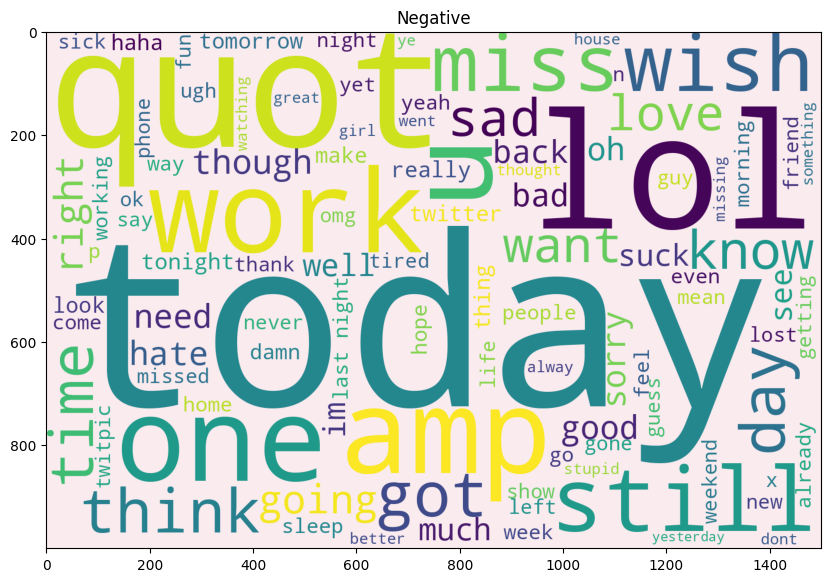

In [114]:
# negative data
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1500,
                      height=1000,
                      background_color='#FAEBEFFF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Negative")

* positive data has words like love, thank, know etc.
* negative data has words like still, miss, sad etc.
* also some of the words are common like lol, quot, twitter etc.

In [115]:
def one_word_count_plot(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1

    dic = pd.DataFrame({"word":dic.keys(),"count":dic.values()})
    dic = dic.sort_values(by = "count", ascending = False)
    plt.figure(figsize = (10,7))
    sns.barplot(x = dic["word"][:20], y = dic["count"][:20])
    plt.title('one word count data')
    plt.show()

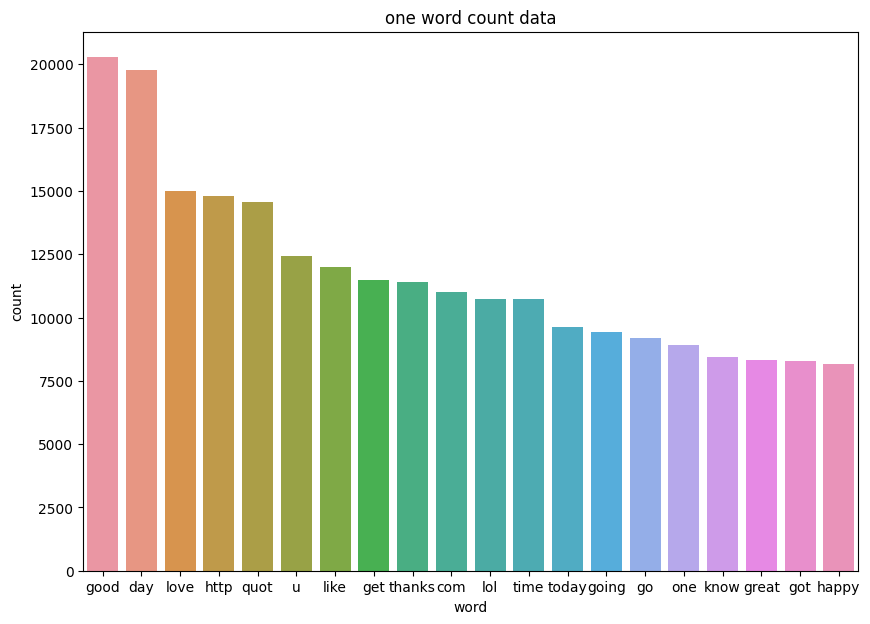

In [116]:
one_word_count_plot(positive_list)

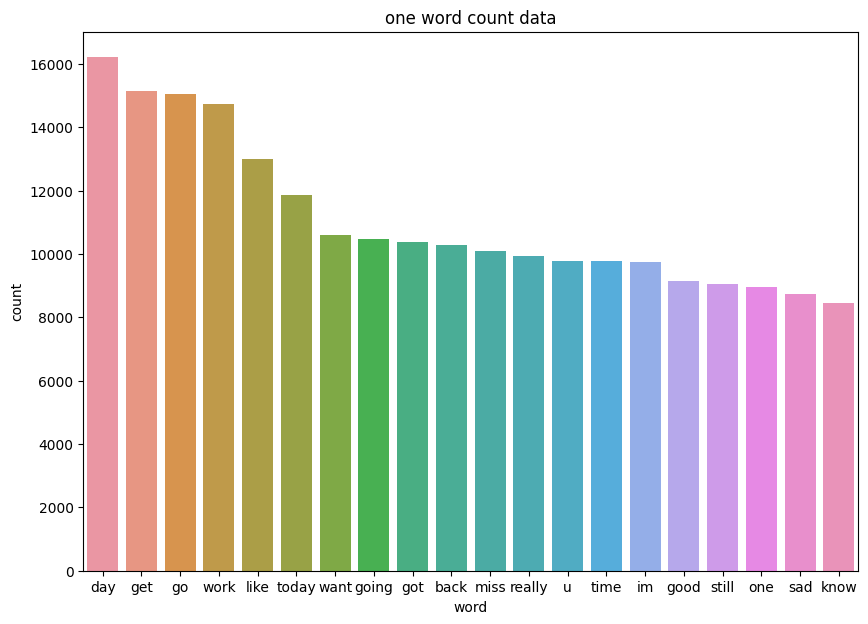

In [117]:
one_word_count_plot(negative_list)

* positive data have more words like love,thanks etc.
* negative data haave more words like work, going, miss

## Classification

Using TF*IDF Vectorizer

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
vector = vectorizer.fit_transform(data_processed["Text"])
y = data_processed["Sentiment"]

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify = y)

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

**MultinomialNB**

training accuracy =  85.0
              precision    recall  f1-score   support

           0       0.83      0.88      0.85    186432
           1       0.87      0.82      0.84    186432

    accuracy                           0.85    372864
   macro avg       0.85      0.85      0.85    372864
weighted avg       0.85      0.85      0.85    372864



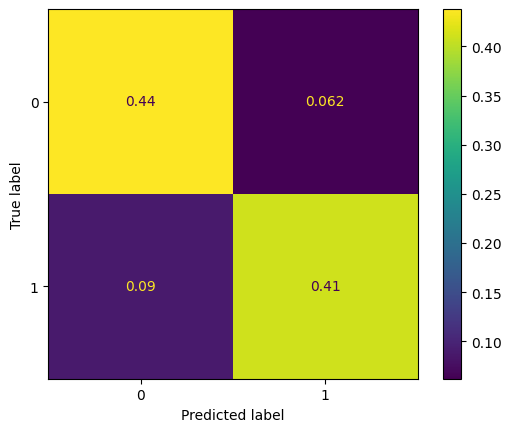

testing accuracy =  77.0
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     62144
           1       0.78      0.73      0.76     62144

    accuracy                           0.77    124288
   macro avg       0.77      0.77      0.77    124288
weighted avg       0.77      0.77      0.77    124288



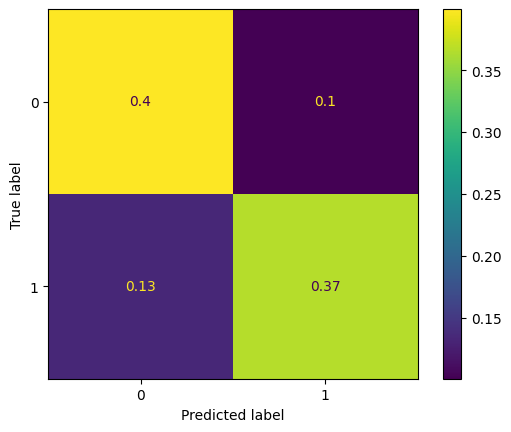

In [128]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

**SVM**

training accuracy =  90.0
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    186432
           1       0.90      0.90      0.90    186432

    accuracy                           0.90    372864
   macro avg       0.90      0.90      0.90    372864
weighted avg       0.90      0.90      0.90    372864



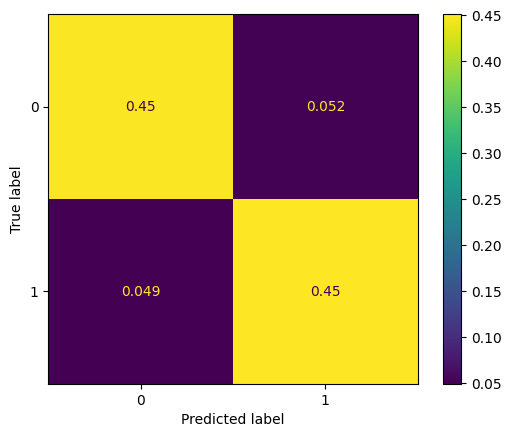

testing accuracy =  77.0
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     62144
           1       0.76      0.79      0.78     62144

    accuracy                           0.77    124288
   macro avg       0.77      0.77      0.77    124288
weighted avg       0.77      0.77      0.77    124288



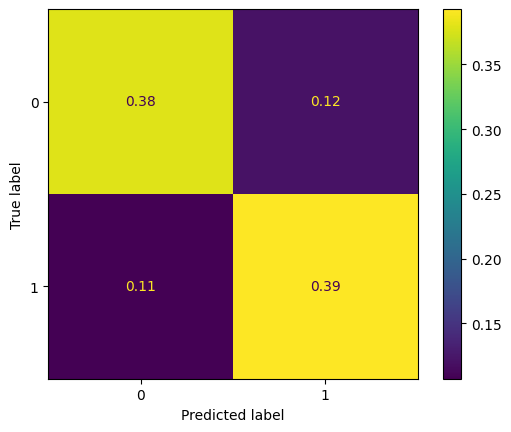

In [129]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

**Logistic Regression**

training accuracy =  83.0
              precision    recall  f1-score   support

           0       0.84      0.81      0.82    186432
           1       0.82      0.84      0.83    186432

    accuracy                           0.83    372864
   macro avg       0.83      0.83      0.83    372864
weighted avg       0.83      0.83      0.83    372864



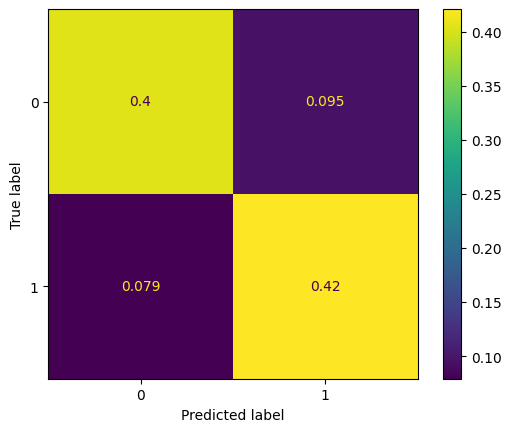

testing accuracy =  78.0
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     62144
           1       0.77      0.80      0.78     62144

    accuracy                           0.78    124288
   macro avg       0.78      0.78      0.78    124288
weighted avg       0.78      0.78      0.78    124288



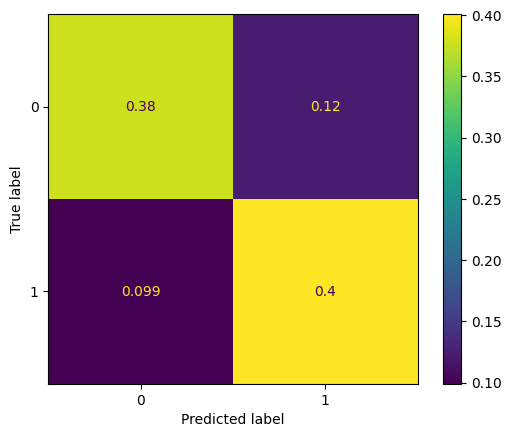

In [130]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,solver='saga')
clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

## Conclusion

In [135]:
table = {
    "Model" : ["Multinomial NB", "SVM", "Logistic"],
    "Training Accuracy" : ["85%","90%","83%"],
    "Training Accuracy" : ["77%","77%","78%"]
 }
df1 = pd.DataFrame(table)
df1.set_index("Model")
df1

,Model,Training Accuracy
0,Multinomial NB,77%
1,SVM,77%
2,Logistic,78%


We see that Logistic regression model performs best with least overfitting as compared to other models and has better performance in testing dataset as well